<a href="https://colab.research.google.com/github/ellierobin54/COVID-19-Analysis/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Modeling and Predicting the Spread of COVID-19** 


---



**Collaborators**: Robin (Jae-Hee) Yoo, Judy Moon, Jae Hyun Kim



## Introduction
In this final project, we will investigate the spread of COVID-19 in the United States from January of 2020. We hope to answer the following two questions: does the spread of COVID-19 display different trends across various regions of the United States? How can we forecast the epidemiological outbreak of COVID‐19 within the United States by predicting the number of confirmed cases using regression techniques? Through this project, we hope to demonstrate our abilities to work with data at different levels of granularities, identify the type of data collected (including missing values, anomalies, etc), and explore characteristics and distributions of individual variables through exploratory data analysis, data cleaning, and provide multiple visualizations to model our given data. We will be using scikit-learn as a tool for our predictive analysis, and we will aim to create a simple Linear Regression model to be able to forecast the number of new confirmed COVID-19 cases for the near future. 






In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## 1. Understanding the Data


###Loading the Data

Run the following cells to load in the data into DataFrames.

The `updated_time_series_covid19_confirmed_US` DataFrame contains labeled data that you will use to evaluate the confirmed COVID-19 status of cities within the United States.

The `updated_times_series_covid19_death` DataFrame contains labeled data that we will use to evaluate the death status of city in the United States.

The `updated_states` DataFrame contains labeled data that we will use to evaluate the status of the CORVID-19 in each state in United States.

The`counties` DataFrame contias labeled data that we will use to evalue the states of the counties including cencus data.

In [ ]:
#using the updated raw data from the JHU CSSE github
updated_time_series_covid19_confirmed_US = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
updated_time_series_covid19_deaths_US = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
updated_states = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-07-2020.csv'
arbridged_counties = 'https://raw.githubusercontent.com/Yu-Group/covid19-severity-prediction/master/data/county_data_abridged.csv'

# path to directory containing data
counties = pd.read_csv(arbridged_counties)
confirmed = pd.read_csv(updated_time_series_covid19_confirmed_US)
death = pd.read_csv(updated_time_series_covid19_deaths_US)
states = pd.read_csv(updated_states)

In [ ]:
counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,...,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,...,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,...,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,...,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,South,East South Central,1.0,57840.0,28607.0,29406.0,0.493114,10351.0,88.9,57322.0,39.0,13175.0,9542.0,NaN,14.9,224.8,52.8,19.208672,87.05,103.0,18.0,1.0,1.0,6.0,0.094317,1805.0,1811.0,1936.0,1944

In [ ]:
confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69


In [ ]:
death.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94,95,97,97,99,99,102,107,108,111,113,114
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,6


In [ ]:
states.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-08 02:32:36,32.3182,-86.9023,9046,369,NaN,8677.0,1,192.923837,115173.0,1178.0,4.079151,84000001,USA,2456.291959,13.022330
1,Alaska,US,2020-05-08 02:32:36,61.3707,-152.4044,374,10,291.0,73.0,2,62.568068,24341.0,NaN,2.673797,84000002,USA,4072.110535,NaN
2,American Samoa,US,2020-05-08 02:32:36,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN
3,Arizona,US,2020-05-08 02:32:36,33.7298,-111.4312,9945,450,1722.0,7773.0,4,136.631222,111086.0,1449.0,4.524887,84000004,USA,1526.175561,14.570136
4,Arkansas,US,2020-05-08 02:32:36,34.9697,-92.3731,3703,87,2123.0,1493.0,5,143.026705,59995.0,462.0,2.349446,84000005,USA,2317.279812,12.476371


# 2. Exploratory Data Analysis (EDA)


---


## **First Data Visualization - Geospatial Hexbin Plot**

### Data Cleaning 
Through our exploratory data analysis, we hope to answer our first question, what factors can be beneficial in predicting the number of confirmed COVID-19 cases throughout different regions of the United States? The `confirmed` and `death` datasets that we imported above contains the information that we can use to aggregate the rate of the COVID-19 confirmed and death number over states in the US. First, we will clean our data for better visualization.

In [ ]:
# clean data from the each counties' total_death and Total confirmed
confirmed['Total_confirmed']=confirmed['5/7/20']
confirmed_updated = confirmed.drop(confirmed.iloc[:, 11:-1], axis=1)
death["Total_deaths"]=death['5/7/20']
death_updated = death.drop(death.iloc[:,12:-1], axis=1)

# Merge confirmed and death data set into one table
summary = death_updated.merge(confirmed_updated,on=['UID', 'iso2','iso3','code3','FIPS','Admin2','Province_State',
                                    "Country_Region", 'Lat',"Long_","Combined_Key"])
summary=summary.rename(columns={"Admin2":"CountyName","Long_":"Long"})
summary=summary.drop(columns=['iso3','iso2','code3','Country_Region'])


In [ ]:
summary.head(10)

,UID,FIPS,CountyName,Province_State,Lat,Long,Combined_Key,Population,Total_deaths,Total_confirmed
0,16,60.0,NaN,American Samoa,-14.271000,-170.132000,"American Samoa, US",55641,0,0
1,316,66.0,NaN,Guam,13.444300,144.793700,"Guam, US",164229,5,149
2,580,69.0,NaN,Northern Mariana Islands,15.097900,145.673900,"Northern Mariana Islands, US",55144,2,15
3,630,72.0,NaN,Puerto Rico,18.220800,-66.590100,"Puerto Rico, US",2933408,102,2031
4,850,78.0,NaN,Virgin Islands,18.335800,-64.896300,"Virgin Islands, US",107268,4,66
5,84001001,1001.0,Autauga,Alabama,32.539527,-86.644082,"Autauga, Alabama, US",55869,3,61
6,84001003,1003.0,Baldwin,Alabama,30.727750,-87.722071,"Baldwin, Alabama, US",223234,5,205
7,84001005,1005.0,Barbour,Alabama,31.868263,-85.387129,"Barbour, Alabama, US",24686,1,51
8,84001007,1007.0,Bibb,Alabama,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,44
9,84001009,1009.0,Blount,Alabama,33.982109,-86.567906,"Blount, Alabama, US",57826,0,44


As you can see, each county have `UID` (or countyFIPS) with `FIPS`, which refers to state FIPS. So if UID is 84001001 and FIPS is 1001.0, this represents the Autauga County, Alabama.

Compare to `countyFIPS` and `STATEFP` in `counties`, `summary` have extra digits in the state FIPS and FIPS.

So first, we are going to rename `UID` as countyFIPS and `FIPS` as state FIPS. Then eliminate unessary digits from those values.

In [ ]:
# change name of 'UID' and 'FIPS' in summary
summary=summary.rename(columns={"UID":"County FIPS","FIPS":"State FIPS"})

# eliminate digits for 'County FIPS'. 
summary['County FIPS']=summary['County FIPS'].apply(str).str.replace('840','')
summary['County FIPS']=summary['County FIPS'].astype(float)

# eliminate digits for 'State FIPS'
summary['State FIPS']=summary['State FIPS'].apply(lambda x: x//1000 if x>1000 else x)
summary.head(6)

,County FIPS,State FIPS,CountyName,Province_State,Lat,Long,Combined_Key,Population,Total_deaths,Total_confirmed
0,16.0,60.0,NaN,American Samoa,-14.271000,-170.132000,"American Samoa, US",55641,0,0
1,316.0,66.0,NaN,Guam,13.444300,144.793700,"Guam, US",164229,5,149
2,580.0,69.0,NaN,Northern Mariana Islands,15.097900,145.673900,"Northern Mariana Islands, US",55144,2,15
3,630.0,72.0,NaN,Puerto Rico,18.220800,-66.590100,"Puerto Rico, US",2933408,102,2031
4,850.0,78.0,NaN,Virgin Islands,18.335800,-64.896300,"Virgin Islands, US",107268,4,66
5,1001.0,1.0,Autauga,Alabama,32.539527,-86.644082,"Autauga, Alabama, US",55869,3,61


In [ ]:
#Change name of countyFIPS and STATEFP of counties to same name as summary.
counties=counties.rename(columns={"countyFIPS":"County FIPS", "STATEFP":"State FIPS",'State':'Province_State'})

#Find and emove Unrelevant FIPS in the counties
counties['County FIPS'].unique()

#Remove strings values
counties=counties[~counties['County FIPS'].str.contains('City')]
counties['County FIPS'].unique()
counties.head()

,County FIPS,State FIPS,COUNTYFP,CountyName,StateName,Province_State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,...,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,...,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,...,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,...,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,...,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,South,East South Central,1.0,57840.0,28607.0,29406.0,0.493114,10351.0,88.9,57322.0,39.0,13175.0,9542.0,NaN,14.9,224.8,52.8,19.208672,87.05,103.0,18.0,1.0,1.0,6.0,0.094317,1805.0,1811.

Now we will merge `counties` and `summary` base on `CountyName` ,`State FIPS`and `Province_State`.

In [ ]:
summary=summary.merge(counties[['State FIPS','CountyName','Province_State','CensusDivisionName','Rural-UrbanContinuumCode2013']],
           on = ['State FIPS','CountyName','Province_State'], how='left')
summary.head(6)

,County FIPS,State FIPS,CountyName,Province_State,Lat,Long,Combined_Key,Population,Total_deaths,Total_confirmed,CensusDivisionName,Rural-UrbanContinuumCode2013
0,16.0,60.0,NaN,American Samoa,-14.271000,-170.132000,"American Samoa, US",55641,0,0,NaN,NaN
1,316.0,66.0,NaN,Guam,13.444300,144.793700,"Guam, US",164229,5,149,NaN,NaN
2,580.0,69.0,NaN,Northern Mariana Islands,15.097900,145.673900,"Northern Mariana Islands, US",55144,2,15,NaN,NaN
3,630.0,72.0,NaN,Puerto Rico,18.220800,-66.590100,"Puerto Rico, US",2933408,102,2031,NaN,NaN
4,850.0,78.0,NaN,Virgin Islands,18.335800,-64.896300,"Virgin Islands, US",107268,4,66,NaN,NaN
5,1001.0,1.0,Autauga,Alabama,32.539527,-86.644082,"Autauga, Alabama, US",55869,3,61,East South Central,2.0


In [ ]:
summary.CountyName.value_counts().index.tolist

<bound method IndexOpsMixin.tolist of Index(['Unassigned', 'Washington', 'Jefferson', 'Franklin', 'Jackson',
       'Lincoln', 'Madison', 'Clay', 'Montgomery', 'Union',
       ...
       'Sargent', 'Tom Green', 'Itawamba', 'Milam', 'Emery', 'Matagorda',
       'Owsley', 'Poweshiek', 'Trempealeau', 'Arenac'],
      dtype='object', length=1901)>

As you see, there are a large number of state with the `CountyName` of `Unassigned` or `Out of (state name)` or `NaN`. These are probably missing values. Now, let's see what states have counties and which do not.

In [ ]:
summary['Missing County']=(summary['CountyName'].isin(['Unassigned']) |
                           summary['CountyName'].str.contains('Out of') |
                           summary['CountyName'].isna())
summary_Unassigned_pivot = pd.pivot_table(summary,index='Province_State',
                                          values= 'CountyName',columns='Missing County',
                                          aggfunc="count",fill_value=0,margins=True,
                                          margins_name="Total")
summary_Unassigned_pivot = (summary_Unassigned_pivot.drop(summary_Unassigned_pivot.
                                                          index[-1]).sort_values('Total',ascending=0))
summary_Unassigned_pivot

Missing County,False,True,Total
Province_State,,,
Texas,254,2,256.0
Georgia,159,2,161.0
Virginia,133,2,135.0
Kentucky,120,2,122.0
Missouri,116,2,118.0
Kansas,105,2,107.0
Illinois,102,2,104.0
North Carolina,100,2,102.0
Iowa,99,2,101.0


Notice that Unassigned or inappropriate counties appear only to be assigned to the mainland state of the United States. Now we want to dig deeper into why such data is inappropriate.

In [ ]:
Inaproporiate =summary[summary['Missing County']==True]
Inaproporiate.head()

,County FIPS,State FIPS,CountyName,Province_State,Lat,Long,Combined_Key,Population,Total_deaths,Total_confirmed,CensusDivisionName,Rural-UrbanContinuumCode2013,Missing County
0,16.0,60.0,NaN,American Samoa,-14.2710,-170.1320,"American Samoa, US",55641,0,0,NaN,NaN,True
1,316.0,66.0,NaN,Guam,13.4443,144.7937,"Guam, US",164229,5,149,NaN,NaN,True
2,580.0,69.0,NaN,Northern Mariana Islands,15.0979,145.6739,"Northern Mariana Islands, US",55144,2,15,NaN,NaN,True
3,630.0,72.0,NaN,Puerto Rico,18.2208,-66.5901,"Puerto Rico, US",2933408,102,2031,NaN,NaN,True
4,850.0,78.0,NaN,Virgin Islands,18.3358,-64.8963,"Virgin Islands, US",107268,4,66,NaN,NaN,True


Here we can see that all NaN values are Island and each state have Out of (state) and Unassigned values. Those values with Out of and Unassigned have no latitude and longitude or population values, but have several confirmed and death count of COVID-19. Now we readust the value of the Missing County value using latitude, longitude, and population.

In [ ]:
summary['Missing County']=((summary['Population']==0) |
                           (summary['Lat']==0.0) |
                           (summary['Long']==0.0) )
summary.head(20)

,County FIPS,State FIPS,CountyName,Province_State,Lat,Long,Combined_Key,Population,Total_deaths,Total_confirmed,CensusDivisionName,Rural-UrbanContinuumCode2013,Missing County
0,16.0,60.0,NaN,American Samoa,-14.271000,-170.132000,"American Samoa, US",55641,0,0,NaN,NaN,False
1,316.0,66.0,NaN,Guam,13.444300,144.793700,"Guam, US",164229,5,149,NaN,NaN,False
2,580.0,69.0,NaN,Northern Mariana Islands,15.097900,145.673900,"Northern Mariana Islands, US",55144,2,15,NaN,NaN,False
3,630.0,72.0,NaN,Puerto Rico,18.220800,-66.590100,"Puerto Rico, US",2933408,102,2031,NaN,NaN,False
4,850.0,78.0,NaN,Virgin Islands,18.335800,-64.896300,"Virgin Islands, US",107268,4,66,NaN,NaN,False
5,1001.0,1.0,Autauga,Alabama,32.539527,-86.644082,"Autauga, Alabama, US",55869,3,61,East South Central,2.0,False
6,1003.0,1.0,Baldwin,Alabama,30.727750,-87.722071,"Baldwin, Alabama, US",223234,5,205,East South Central,3.0,False
7,1005.0,1.0,Barbour,Alabama,31.868263,-85.387129,"Barbour, Alabama, US",24686,1,51,East South Central,6.0,False
8,1007.0,1.0,Bibb,Alabama,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,44,East South Central,1.0,False
9,1009.0,1.0,Blount,Alabama,33.982109,-86.567906,"Blount, Alabama, US",57826,0,44,East South Central,1.0,False


### Geospatial Hexbin Plot Visualization

Since we go over the invalid values, now we will look at valid data.Create `valid` DataFrame (w/o Island) from the above. 

In [ ]:
#Missing Coutry ==Fasle (valid vlaues w/o Island)
valid = summary[summary['Missing County']==False].dropna()
valid.head()

,County FIPS,State FIPS,CountyName,Province_State,Lat,Long,Combined_Key,Population,Total_deaths,Total_confirmed,CensusDivisionName,Rural-UrbanContinuumCode2013,Missing County
5,1001.0,1.0,Autauga,Alabama,32.539527,-86.644082,"Autauga, Alabama, US",55869,3,61,East South Central,2.0,False
6,1003.0,1.0,Baldwin,Alabama,30.727750,-87.722071,"Baldwin, Alabama, US",223234,5,205,East South Central,3.0,False
7,1005.0,1.0,Barbour,Alabama,31.868263,-85.387129,"Barbour, Alabama, US",24686,1,51,East South Central,6.0,False
8,1007.0,1.0,Bibb,Alabama,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,44,East South Central,1.0,False
9,1009.0,1.0,Blount,Alabama,33.982109,-86.567906,"Blount, Alabama, US",57826,0,44,East South Central,1.0,False


Now that we have our DataFrame ready, we can start creating our geospatial hexbin plot. Using the valid DataFrame from above, we produce a geospatial hexbin plot that shows the total death count for state within main land of the United States.

In [ ]:
# Make sure exclude the Island since we are only looking for the main land.
# http://en.wikipedia.org/wiki/Extreme_points_of_the_United_States#Westernmost
top = 50 # north lat
left = -127 # west long
right = -66 # east long
bottom =  24.7 # south lat
map_bound = (left,right,bottom,top)

# Set up for subplot
basemap = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (20,8))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Create the hexbin plot
y=ax.hexbin(y=valid["Lat"],x=valid["Long"],
          C=valid[["Total_deaths"]],
          reduce_C_function=np.size, gridsize=70)

plt.title("Geospatial COVID-19 Death Count in US")
fig.colorbar(y,orientation = 'vertical').set_label("Death Count")

# Setting aspect ratio and plotting the hexbins on top of the base map layer
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');


FileNotFoundError: ignored

Furthermore, we created the geospatial hexbin plot base on the Rural-Urban Continuum Code within the mainland of the United States. Here, the lower the code, the counties in the metro area with more population and vice versa.

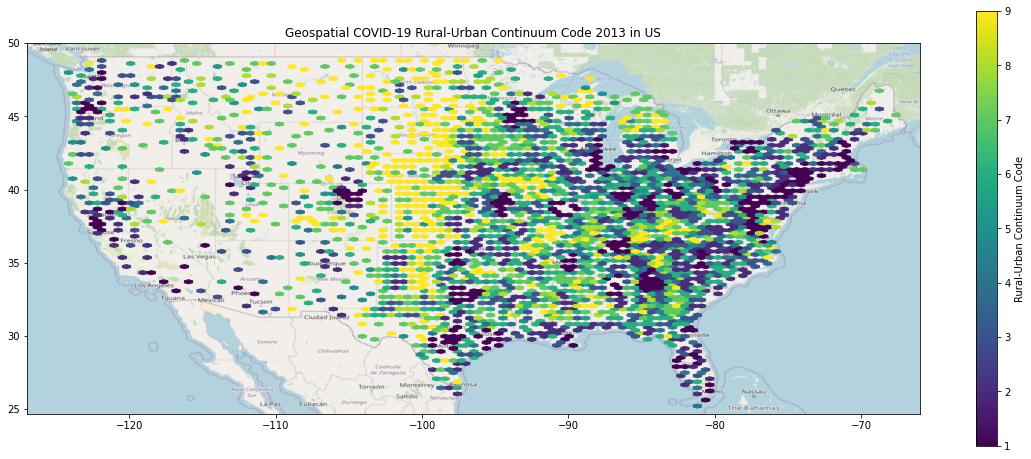

In [ ]:
# Make sure exclude the Island since we are only looking for the main land.
# http://en.wikipedia.org/wiki/Extreme_points_of_the_United_States#Westernmost
top = 50 # north lat
left = -127 # west long
right = -66 # east long
bottom =  24.7 # south lat
map_bound = (left,right,bottom,top)

# Set up for subplot
basemap = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (20,8))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Create the hexbin plot
y=ax.hexbin(y=valid["Lat"],x=valid["Long"],
          C=valid[["Rural-UrbanContinuumCode2013"]],
          reduce_C_function=np.mean, gridsize=100)

plt.title("Geospatial COVID-19 Rural-Urban Continuum Code 2013 in US")
fig.colorbar(y,orientation = 'vertical').set_label("Rural-Urban Continuum Code")

# Setting aspect ratio and plotting the hexbins on top of the base map layer
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');


#### **Analysis**

For the death count, most deaths tend to be more frequent in the East coast, and less heavily concentrated in the Midwestern states. States that seem to have the most densely concentrated death are New York, New Jersey, Virginia, Louisiana, and Rhode Island. Here we found interesting facts that about 33 states have at least one county with no death and confirmed COVID-19. For the Rural-Urban Continuum Code, the countries in the metro area with more population if the code is higher and the countries are urbanized if the code is lower. Compared with the death count hexbin, we figure out that more urbanized areas (where not adjacent to a metro area) have large populations of total death due to COVID-19.



---

## **Second Data Visualization - Plotting Coronavirus Cases by US Region**


For our second visualization, we want to examine the number of confirmed COVID-19 cases across a time span from late January to early May of 2020. We want to compare the trend of coronavirus cases across different regions of the country, and how the pattern of the increase in number of confirmed cases is similar or different based on location. We are only interested in exploring COVID-19 trends within the mainland US, so we will be excluding data from Guam, American Samoa, Northern Mariana Islands, Puerto Rico, and Virgin Islands. 


### Data Cleaning 
We used the most recently updated data from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University to plot our next visualization. This dataset contains data that we can use to plot a line graph of the number of confirmed COVID-19 cases for each state across the span of four consecutive months. We are only interested in investigating data from five most populous cities: **Los Angeles, New York City, Cook, Harris, and Miami**. We will also drop columns that are not relevant to plotting our graph. We will then analyze this graph and observe how different states experienced different trends of COVID-19 transmission rates.


In [ ]:
confirmed_2 = pd.read_csv(updated_time_series_covid19_confirmed_US, index_col=10)

In [ ]:
confirmed_2.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"American Samoa, US",16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Guam, US",316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152
"Northern Mariana Islands, US",580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19
"Puerto Rico, US",630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299
"Virgin Islands, US",850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69


In [ ]:
# Define the five regions of interest.  
regions_5 = [
    'Miami-Dade, Florida, US',
    'Los Angeles, California, US',
    'Harris, Texas, US',
    'Cook, Illinois, US',
    'New York City, New York, US',
]

# Drop unneccesary rows and columns for data cleaning.
confirmed_2.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2',
         'Province_State', 'Country_Region', 'Lat', 'Long_'], axis=1, inplace=True)

# Transpose the data ready for plotting, and select the regions. 
confirmed_new = confirmed_2.transpose()
confirmed_new = confirmed_new[regions_5]
confirmed_new

Combined_Key,"Miami-Dade, Florida, US","Los Angeles, California, US","Harris, Texas, US","Cook, Illinois, US","New York City, New York, US"
1/22/20,0,0,0,0,0
1/23/20,0,0,0,0,0
1/24/20,0,0,0,1,0
1/25/20,0,0,0,1,0
1/26/20,0,1,0,1,0
...,...,...,...,...,...
5/8/20,13664,30319,7594,50236,181783
5/9/20,13841,31241,7803,51674,183289
5/10/20,14007,31703,7878,52655,184417
5/11/20,14167,32263,8176,53381,185357


### Line Plot Visualization

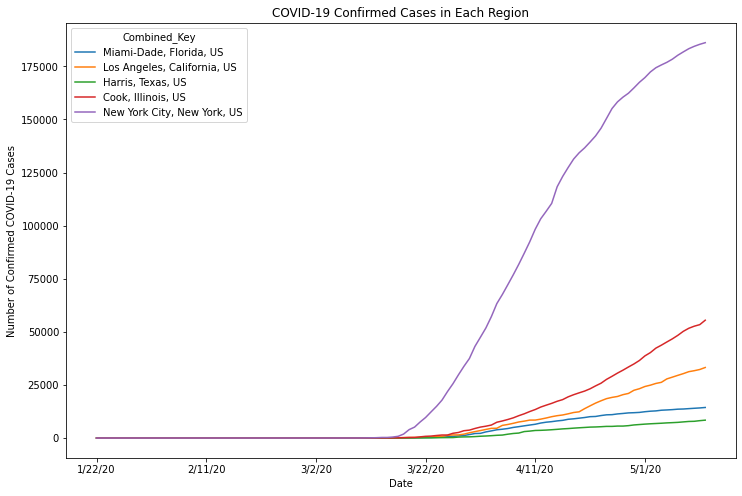

In [ ]:
second_visual = confirmed_new.plot(figsize=(12,8))
second_visual.set_title("COVID-19 Confirmed Cases in Each Region")
second_visual.set_ylabel("Number of Confirmed COVID-19 Cases")
second_visual.set_xlabel("Date")
second_visual

###**Analysis**

We divided up the five regions based on relative location across the mainland of the United States. We chose the five counties based on population -- after doing some research, we found out that Miami-Dade, Los Angeles, Harris, Cook, and New York City were the most populous counties in each state. The states were chosen from the West coast, East coast, Gulf Coast, Midwest, and Rocky Mountain regions of the US. Upon observing the line plot we made above, we can assume that the number of cases for the New York county was much higher than any other state, followed by Cook, Los Angeles, Miami-Dade, and Harris. It is surprising to see how exponentially fast the graph rises from late Mid-Late March and steadily increases with the same exponential rate, even till the most recent date, May 4th. Compared to the strikingly high numbers reached in New York, the number of COVID-19 cases seem to be rising relatively at a much slower rate in other regions of the U.S. We can assume that most of the confirmed cases so far have largely been densely populated in the North Eastern regions of the country and much less amongst the Gulf coast states. 




---
# 3. Prediction Models, Test Data, Model Selection & Evaluation

**Predicting the Rise of COVID-19 Confirmed Cases Within the United States**



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.ticker as ticker


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Loading and Cleaning

In [ ]:
confirmed_3 = pd.read_csv(updated_time_series_covid19_confirmed_US)

In [ ]:
confirmed_3.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69


We want to convert our confirmed_3 dataframe into a long format where we can separate the dates in chronological order of each index. Then, we will drop unneccessary columns that we are not interested in analyzing. We are interested in predicting the increase of confirmed COVID-19 cases within the region of the United States, thus we will be aggregating our values by date. 

In [ ]:
confirmed_3_l = pd.melt(confirmed_3, id_vars=confirmed_3.iloc[:, :11], var_name='date', value_name='confirmed')

In [ ]:
confirmed_3 = confirmed_3_l.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key'])
confirmed_3

,Province_State,Country_Region,Lat,Long_,date,confirmed
0,American Samoa,US,-14.271000,-170.132000,1/22/20,0
1,Guam,US,13.444300,144.793700,1/22/20,0
2,Northern Mariana Islands,US,15.097900,145.673900,1/22/20,0
3,Puerto Rico,US,18.220800,-66.590100,1/22/20,0
4,Virgin Islands,US,18.335800,-64.896300,1/22/20,0
...,...,...,...,...,...,...
365227,Utah,US,39.372319,-111.575868,5/12/20,28
365228,Utah,US,38.996171,-110.701396,5/12/20,13
365229,Utah,US,37.854472,-111.441876,5/12/20,167
365230,Utah,US,40.124915,-109.517442,5/12/20,16


We now want to check if our data contains any missing values. We want to fill in the cell below to print the number of NaN values in each column. If there are NaN values, we will replace them with appropriate filler values. We will check that there are no missing values in our new dataset.

In [ ]:
confirmed_3[['Province_State']] = confirmed_3[['Province_State']].fillna('')

confirmed_3.fillna(0, inplace=True)


In [ ]:
confirmed_3.isna().sum().sum()


0

The provided test above checks that there are no missing values in our dataset.

Now, we want to aggregate our data values by date. We don't have to aggregate our data by country/region because our dataset comes from the dataframe that contains labeled data on the confirmed COVID-19 status of cities within the United States. We then will drop the latitude and longitude columns, as we are not interested in exploring the effects of latitude/longitude with the prediction of the increase of confirmed cases throughout the nation.

In [ ]:
confirmed_US_date = confirmed_3.groupby(['Country_Region', 'date'], 
                                        sort=False).sum().reset_index()
# We want to make sure that our dates are chronologically ordered from 
# earliest to latest, hence we set our sort parameter equal to False.

confirmed_US_date.drop(['Lat', 'Long_'], axis=1, inplace=True)
confirmed_US_date


,Country_Region,date,confirmed
0,US,1/22/20,1
1,US,1/23/20,1
2,US,1/24/20,2
3,US,1/25/20,2
4,US,1/26/20,5
...,...,...,...
107,US,5/8/20,1283929
108,US,5/9/20,1309550
109,US,5/10/20,1329260
110,US,5/11/20,1347881


Next, we want to create a list for the number of days that has passed since the first recording of confirmed COVID-19 cases, which is January 22, 2020. We know from above that the confirmed_US_date table has 106 rows, thus we should be getting 105 days from 01/22/2020.

In [ ]:
list_of_days = np.array([i for i in range(len(confirmed_US_date['date']))])
list_of_days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111])

We now want to produce a line plot displaying confirmed COVID-19 cases with our finalized dataframe above. We will be implementing a logarithmic scale to produce a more linear shape with our plot, rather than an exponential graph.



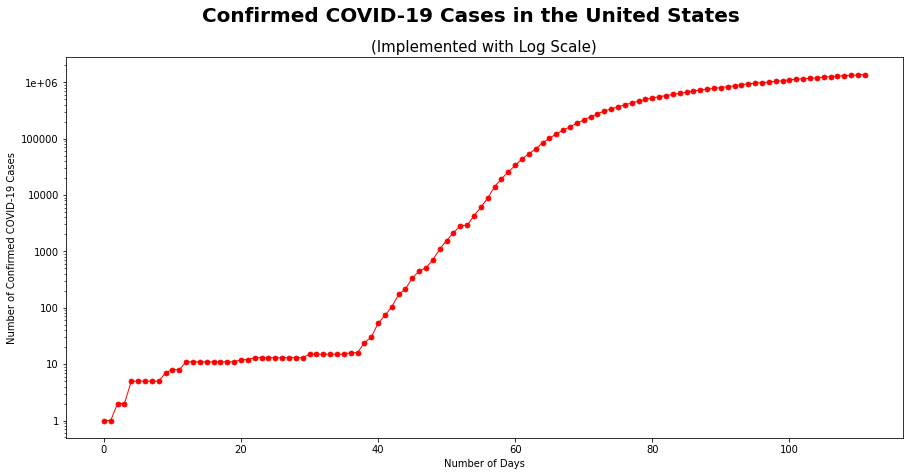

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.title("(Implemented with Log Scale)", color='black', fontsize=15)

sns.lineplot(x=list_of_days, y=confirmed_US_date['confirmed'],
             markeredgecolor="red", markerfacecolor="red", markersize=5, marker="o",
             sort=False, linewidth=1, color="red")

plt.suptitle(f"Confirmed COVID-19 Cases in the United States", fontsize=20,
             fontweight='bold', color='Black')

plt.ylabel('Number of Confirmed COVID-19 Cases')
plt.xlabel('Number of Days')
# The number of days (the x-axis) is specifying the number of days since the first recorded coronavirus case,
# which is January 1, 2020. 

plt.show()

As we can see here in the plot above, the number of confirmed COVID-19 cases remained relatively stagnant for the first ~35 days since January 22nd. The numebr of cases exponentially increased from the 40th day mark, then steadily increased with a steep slope until the 80th day mark since the first recorded confirmed case, then plateaued early May.  

### **Predictive Analysis & Basic Classification**

In order to proceed with our predictive analysis, we first want to make a list of the number of confirmed COVID-19 cases from our us_confirmed_data. 

In [ ]:
us_confirmed_data = confirmed_US_date["confirmed"].tolist()
us_confirmed_data

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 24,
 30,
 53,
 73,
 104,
 172,
 217,
 336,
 450,
 514,
 708,
 1105,
 1557,
 2147,
 2857,
 2918,
 4307,
 6096,
 8873,
 14094,
 19403,
 25725,
 33634,
 43663,
 53736,
 65778,
 83836,
 101657,
 121465,
 140909,
 161831,
 188172,
 213242,
 243622,
 275367,
 308650,
 336802,
 366317,
 397121,
 428654,
 462780,
 496535,
 526396,
 555313,
 580619,
 607670,
 636350,
 667592,
 699706,
 727959,
 754376,
 779682,
 807023,
 835150,
 869170,
 905358,
 938154,
 965785,
 988197,
 1012582,
 1039909,
 1069424,
 1103461,
 1132539,
 1158040,
 1180375,
 1204351,
 1229331,
 1257023,
 1283929,
 1309550,
 1329260,
 1347881,
 1369574]

We then want to define the feature we want to use in order to predict the number of COVID-19 cases in the upcoming weeks and months. We will be defining X, our feature, to days (105 days). 

In [ ]:
X = list_of_days.reshape(-1, 1)
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

Because we implemented a log scale on the y-values of our initial data visualization, we want to implement the same logarithmic scale onto the list of confirmed COVID-19 cases that we made above. 

In [ ]:
Y = np.log(us_confirmed_data).tolist()
Y

[0.0,
 0.0,
 0.6931471805599453,
 0.6931471805599453,
 1.6094379124341003,
 1.6094379124341003,
 1.6094379124341003,
 1.6094379124341003,
 1.6094379124341003,
 1.9459101490553132,
 2.0794415416798357,
 2.0794415416798357,
 2.3978952727983707,
 2.3978952727983707,
 2.3978952727983707,
 2.3978952727983707,
 2.3978952727983707,
 2.3978952727983707,
 2.3978952727983707,
 2.3978952727983707,
 2.4849066497880004,
 2.4849066497880004,
 2.5649493574615367,
 2.5649493574615367,
 2.5649493574615367,
 2.5649493574615367,
 2.5649493574615367,
 2.5649493574615367,
 2.5649493574615367,
 2.5649493574615367,
 2.70805020110221,
 2.70805020110221,
 2.70805020110221,
 2.70805020110221,
 2.70805020110221,
 2.70805020110221,
 2.772588722239781,
 2.772588722239781,
 3.1780538303479458,
 3.4011973816621555,
 3.970291913552122,
 4.290459441148391,
 4.6443908991413725,
 5.147494476813453,
 5.37989735354046,
 5.817111159963204,
 6.1092475827643655,
 6.2422232654551655,
 6.56244409369372,
 7.007600613951853,
 7.

The training data we have right now is all the data we have available for both training models and testing the models that we train. We therefore need to split the training data into separate training and testing datsets. We will use the train_test_split function to split out 10% of the data for test.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.1,
                                                    shuffle=False)

We now want to fit a linear model to describe the relationship between the days passed since 01/22 and all available covariates. We need to train our model using our X_train and y_train data using the fit() method.

In [ ]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)
Y_pred

array([15.69400173, 15.85766885, 16.02133597, 16.18500309, 16.34867021,
       16.51233733, 16.67600445, 16.83967157, 17.00333869, 17.16700581,
       17.33067293, 17.49434005])

We now want to create a scatter plot for our predictions vs. the true number of COVID-19 cases.

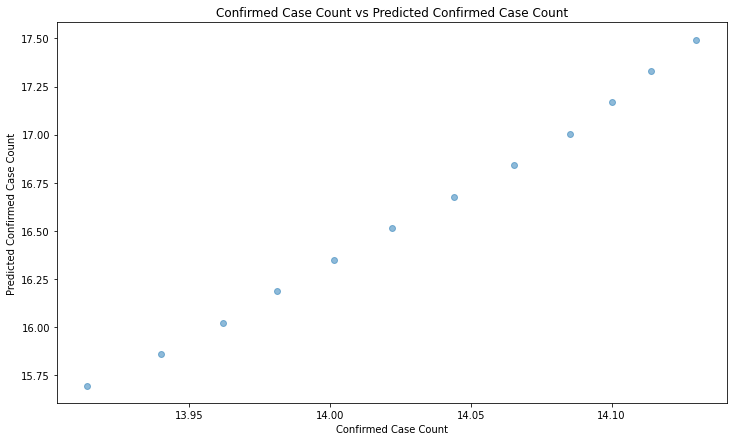

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Confirmed Case Count")
plt.ylabel("Predicted Confirmed Case Count")
plt.title("Confirmed Case Count vs Predicted Confirmed Case Count");

Our model above is not 100% perfect -- otherwise, we would see a line of slope 1. Thus, we want to compute the root mean squared error (RMSE) of our predicted confirmed cases to check our model's error.

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(actual_y, predicted_y):
    return np.sqrt(np.mean((actual_y - predicted_y)**2, axis=0))

# Compute the RMSE for our predictions on both the training data X_train and the test set X_test.
train_error = rmse(Y_train, linear_model.predict(X_train))
test_error = rmse(Y_test, linear_model.predict(X_test))

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 1.1944380074193541
Test RMSE: 2.611873251773417


As we can see above, our training error is lower then the test error. This could be happening from "overfitting" as the model is overfit to the training data, thus explaining why it has a higher root mean square error (the test data).

### **Linear Regression to Model Future COVID-19 Cases**


We want to now use our trained linear regression model to forecast the number of confirmed COVID-19 cases in the near future.

In [ ]:
# We can get the coefficient and intercept of our linear model.
print(linear_model.coef_[0], ",", linear_model.intercept_)

0.16366711967555195 , -0.6727102362814881


In [ ]:
# We can now predict the y values (confirmed cases) using our linear regression model. 
# We want to predict the number of confirmed cases for the next month, or 30 days.

X_new = np.arange(len(list_of_days), len(list_of_days) + 30).tolist()
Y_new = [(linear_model.coef_ *x+linear_model.intercept_)[0] for x in X_new]

We now want to visualize our predictions for the number of confirmed cases in the US for the next 30 days. Going back to the lineplot we made above, "Confirmed COVID-19 Cases in the United States", we implemented a logarithmic scale onto our y-values. Now, because we want to know the actual number of confirmed cases (without the scale), we need to transform our train and test data back to the original scale. 

In [ ]:
# We can change the scale from log by calculating e^x for each value of x in our input array.
# The numpy function np.exp will do this for us. 

Y_train_original = np.exp(Y_train).tolist()

Y_test_original = np.exp(Y_test).tolist()

Y_pred_original = np.exp(Y_pred).tolist()

Y_new_original = np.exp(Y_new).tolist()

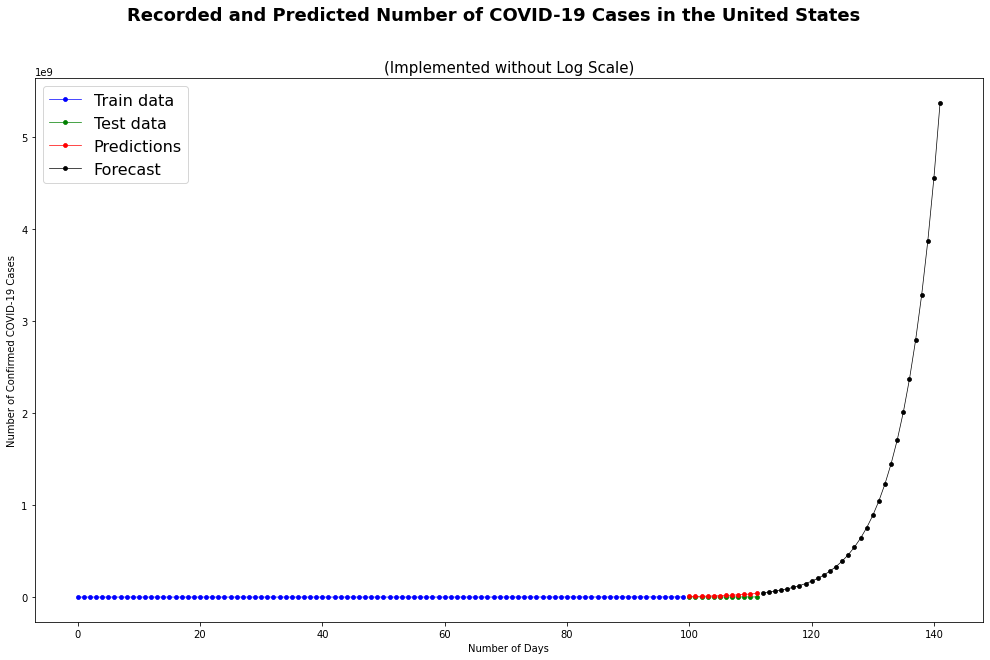

In [ ]:
# Non-Logarithmic Scale

fig, ax = plt.subplots(figsize=(17, 10))
plt.title("(Implemented without Log Scale)", color='black', fontsize=15)

sns.lineplot(x=X_train.reshape(-1), y= Y_train_original,
             markeredgecolor="blue", markerfacecolor="blue", markersize=4, marker="o",
             sort=False, linewidth=0.7, color="blue")

sns.lineplot(x=X_test.reshape(-1), y= Y_test_original,
             markeredgecolor="green", markerfacecolor="green", markersize=4, marker="o",
             sort=False, linewidth=0.7, color="green")

sns.lineplot(x=X_test.reshape(-1), y= Y_pred_original,
             markeredgecolor="red", markerfacecolor="red", markersize=4, marker="o",
             sort=False, linewidth=0.7, color="red")

sns.lineplot(x=X_new, y= Y_new_original,
             markeredgecolor="black", markerfacecolor="black", markersize=4, marker="o",
             sort=False, linewidth=0.7, color="black")

plt.suptitle(f"Recorded and Predicted Number of COVID-19 Cases in the United States", 
             fontsize=18, fontweight='bold', color='black')

plt.ylabel('Number of Confirmed COVID-19 Cases')
plt.xlabel('Number of Days')
plt.legend(['Train data', 'Test data', 'Predictions', 'Forecast'], prop={'size': 16})
plt.show()

### **Overfitting and Cross Validation**

As we pointed out before, our training error is lower then the test error. To avoid "overfitting" and to increase our model's accuracy by adding more features to our model. 

Just by looking at the cumulative confirmed cases in the data, it is apparent that it is hard to predict the future since the total confirmed case is growing exponentially. So it is now better to use the new daily cases in the model to see the rate of growth. In addition to the daily confirmed cases, we added one more feature, the daily death cases, in the model to increase the accuracy.  

In [ ]:
#This calculates the daily confirmed cases from the confirmed dataframe which only has cumulative confirmed cases. 

new_confirmed = confirmed.drop(columns = 'Total_confirmed')
cumulative_list = new_confirmed.loc[:, '1/22/20':].sum().tolist()
daily_cases = [cumulative_list[i + 1] - cumulative_list[i] for i in range(len(cumulative_list)-1)]
daily_cases.insert(0,1)
daily_cases

[1,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 8,
 6,
 23,
 20,
 31,
 68,
 45,
 119,
 114,
 64,
 194,
 397,
 452,
 590,
 710,
 61,
 1389,
 1789,
 2777,
 5221,
 5309,
 6322,
 7909,
 10029,
 10073,
 12042,
 18058,
 17821,
 19808,
 19444,
 20922,
 26341,
 25070,
 30380,
 31745,
 33283,
 28152,
 29515,
 30804,
 31533,
 34126,
 33755,
 29861,
 28917,
 25306,
 27051,
 28680,
 31242,
 32114,
 28253,
 26417,
 25306,
 27341,
 28127,
 34020,
 36188,
 32796,
 27631,
 22412,
 24385,
 27327,
 29515,
 34037,
 29078,
 25501,
 22335,
 23976,
 24980,
 27692,
 26906,
 25621,
 19710,
 18621,
 21693]

Since we created the plot that reflects the total confirmed cases as time passes, we wanted to see the trend of the daily confirmed cases. Therefore, we plotted the following scatter plot.

Text(0, 0.5, 'New Confirmed Cases')

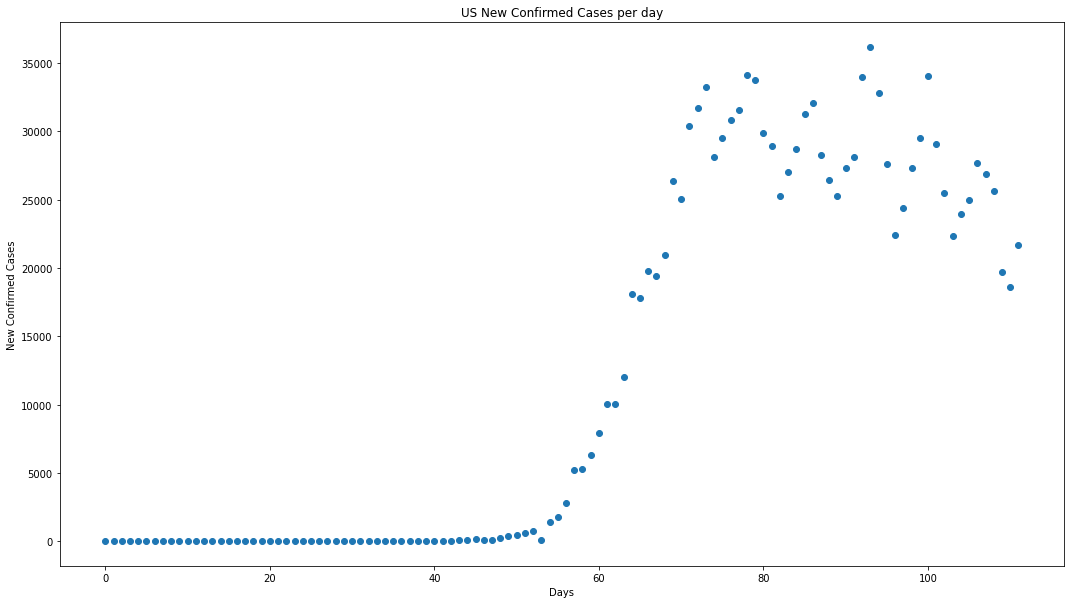

In [ ]:
Y_daily = np.array(daily_cases)
X_daily = np.array(confirmed_US_date.index.tolist())
plt.figure(figsize=(18,10))
plt.scatter(X_daily, Y_daily)
plt.title('US New Confirmed Cases per day')
plt.xlabel('Days')
plt.ylabel('New Confirmed Cases')

From the US New Confirmed Cases per day plot, we noticed that as time passes, the rate of increase in the new confirmed cases is slowing down and gradually decreasing. So we created another plot that shows the relationship between the total confirmed cases and the new confirmed cases. And to see the easier representation of the relationship, we also created the plot on those variables in a log scale. Moreover, we also created the plot that shows the relationship between the total confirmed cases and new daily death cases.

Text(0, 0.5, 'New Confirmed Cases')

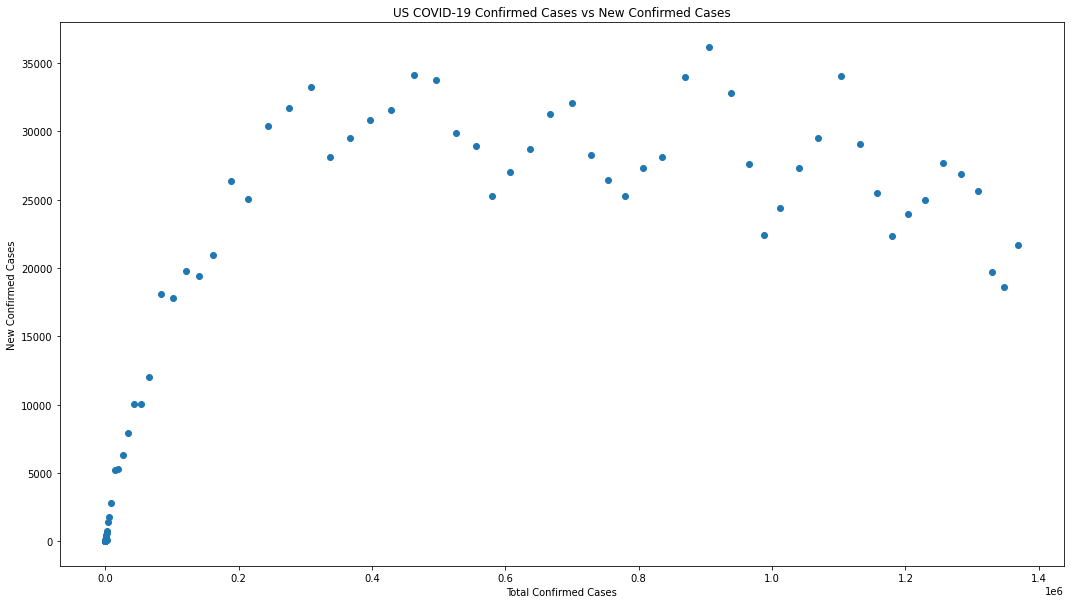

In [ ]:
Y_daily = np.array(daily_cases)
Tot_confirmed = np.array(cumulative_list)
plt.figure(figsize=(18,10))
plt.scatter(Tot_confirmed, Y_daily)
plt.title('US COVID-19 Confirmed Cases vs New Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('New Confirmed Cases')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'New Confirmed Cases')

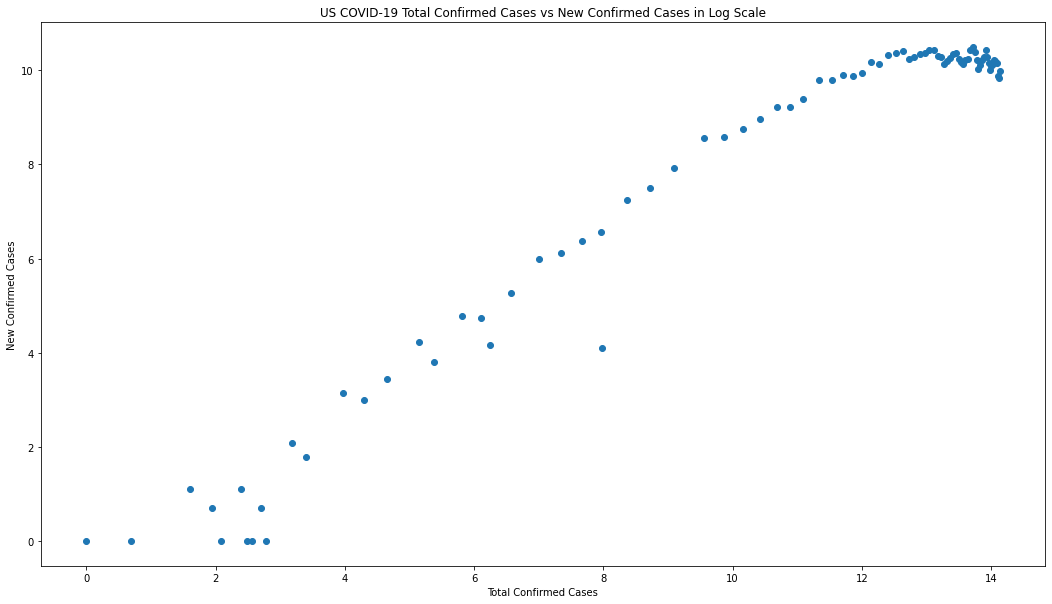

In [ ]:
Y_daily_log = np.log(np.array(daily_cases))
Tot_confirmed_log = np.log(np.array(cumulative_list))
plt.figure(figsize=(18,10))
plt.scatter(Tot_confirmed_log,Y_daily_log)
plt.title('US COVID-19 Total Confirmed Cases vs New Confirmed Cases in Log Scale')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('New Confirmed Cases')

In [ ]:
new_death = death.drop(columns = 'Total_deaths')
cumulative_deaths = new_death.loc[:, '1/22/20':].sum().tolist()
daily_deaths = [cumulative_deaths[i + 1] - cumulative_deaths[i] for i in range(len(cumulative_deaths)-1)]
daily_deaths.insert(0,1)
daily_deaths

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 4,
 1,
 2,
 3,
 4,
 1,
 6,
 4,
 9,
 9,
 6,
 14,
 28,
 34,
 57,
 78,
 96,
 90,
 143,
 185,
 227,
 308,
 410,
 539,
 621,
 632,
 798,
 1215,
 1205,
 1550,
 1287,
 1261,
 1411,
 1649,
 2297,
 2079,
 1994,
 2069,
 2009,
 1744,
 1784,
 2392,
 2472,
 2093,
 2584,
 2342,
 1192,
 1714,
 2427,
 2326,
 2312,
 1769,
 2262,
 1126,
 1338,
 2136,
 2612,
 2029,
 1947,
 1426,
 1313,
 1240,
 2142,
 2391,
 2207,
 1518,
 1615,
 731,
 1156,
 1694]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'Daily Deaths Cases')

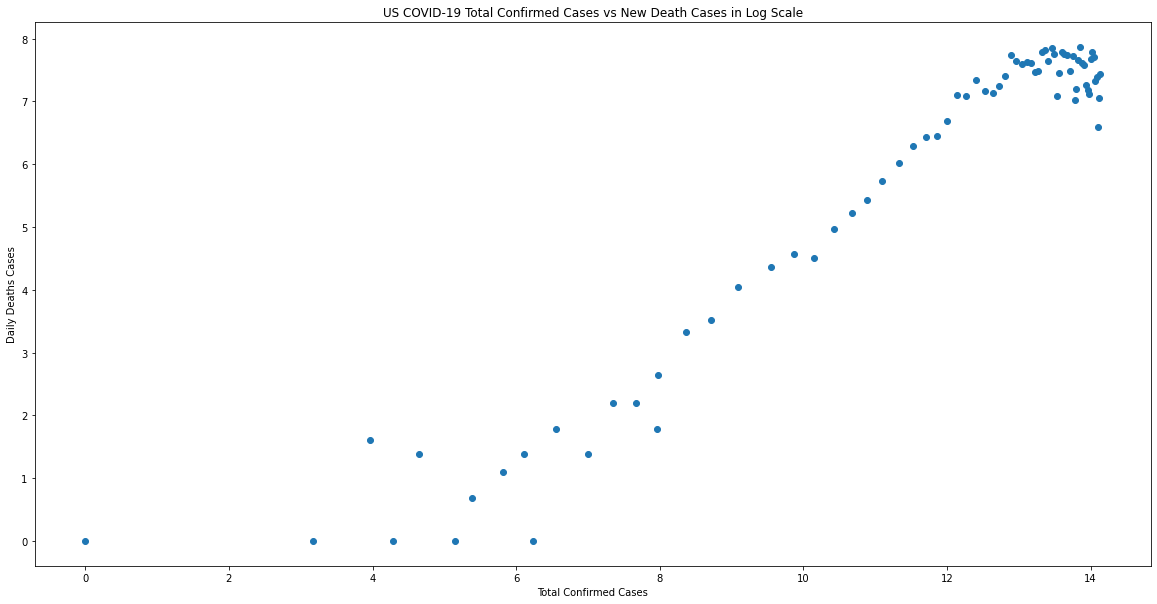

In [ ]:
Tot_confirmed_log = np.log(Tot_confirmed)
Y_deaths_log = np.log(daily_deaths)
plt.figure(figsize=(20,10))
plt.scatter(Tot_confirmed_log, Y_deaths_log)
plt.title('US COVID-19 Total Confirmed Cases vs New Death Cases in Log Scale')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Daily Deaths Cases')

From the these plots, it is clear that the logarithmic scale of daily death cases and daily confirmed cases has linear relationship with the logarithmic scale of total confirmed cases. So this results indicates we might be able to use the daily death cases and daily confirmed cases to estimate the total confirmed cases in a logarithmic scale. Therefore, we carried out the Kfold cross validation with one feature: daily confirmed cases. And then added the daily death cases feature on the linear model to see whether it improves the accuracy of the model. 

In [ ]:
sum_data = pd.DataFrame(list(zip(Tot_confirmed_log[40:], Y_daily_log[40:], Y_deaths_log[40:], X_daily[40:])),
              columns=['Total Confirmed Log','Daily Confirmed Log', 'Daily Deaths Log', 'Days'])
sum_data.head(50)

,Total Confirmed Log,Daily Confirmed Log,Daily Deaths Log,Days
0,3.970292,3.135494,1.609438,40
1,4.290459,2.995732,0.000000,41
2,4.644391,3.433987,1.386294,42
3,5.147494,4.219508,0.000000,43
4,5.379897,3.806662,0.693147,44
5,5.817111,4.779123,1.098612,45
6,6.109248,4.736198,1.386294,46
7,6.242223,4.158883,0.000000,47
8,6.562444,5.267858,1.791759,48
9,7.007601,5.983936,1.386294,49


In [ ]:
split_point = int(sum_data.shape[0]*0.75)

training_set = sum_data.iloc[:split_point]
test_set = sum_data.iloc[split_point:]

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

X_training = training_set[['Daily Confirmed Log']]
Y_training = training_set['Total Confirmed Log']
X_test = test_set[['Daily Confirmed Log']]
Y_test = test_set['Total Confirmed Log']

lin_model.fit(X_training, Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_Predicted = lin_model.predict(X_training)
Y_Real = Y_training
print("Training Error (RMSE):", rmse(Y_Real, Y_Predicted))

Training Error (RMSE): 0.6819623396577809


In [ ]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

In [ ]:
cv_error = cross_validate_rmse(lin_model, X_training, Y_training)
print("KFold Validation RMSE: {}".format(cv_error))

KFold Validation RMSE: 0.7578624481406704


In [ ]:
from sklearn.linear_model import LinearRegression
final_model = LinearRegression()

X_training_f = training_set[['Daily Confirmed Log', 'Daily Deaths Log']]
Y_training = training_set['Total Confirmed Log']
X_test_f = test_set[['Daily Confirmed Log', 'Daily Deaths Log']]
Y_test = test_set['Total Confirmed Log']

final_model.fit(X_training_f, Y_training)
Y_Predicted_final = final_model.predict(X_test_f)
Y_Real_fianl = Y_test
print("Final Test Model Error (RMSE):", rmse(Y_Real_fianl, Y_Predicted_final))

Final Test Model Error (RMSE): 1.1447680515895724


In [ ]:
Y_Predicted_final = final_model.predict(X_training_f)
Y_Real_fianl = Y_training
print("Final Training Model Error (RMSE):", rmse(Y_Real_fianl, Y_Predicted_final))

Final Training Model Error (RMSE): 0.47638541293362907


Using the final linear model to predict our results, we got 1.009 for the test error (RMSE), which is pretty low. Moreover, this low RMSE shows that the two features (daily confirmed log and daily death log) helped increase the accuracy of the model. So this tells us that there can be a linear relationship between daily death cases and daily confirmed cases in log scale and might be able to use the model to predict the number of future total confirmed cases. However, looking at the concentrated plots as the total confirmed cases in log scale increases, we can infer that at some point the total confirmed and death cases in log scale will fall rapidly. This shows that there will be a gradual decrease in both confirmed and death cases at some value of the total confirmed case. The increase in total confirmed cases will slow down and eventually stop. To see this, we have to create the curve fitting model with the quadratic linear regression, but since the plots are very clustered with not much of a pattern and we don’t have more data regarding the moment of the rapid fall, it is hard for us to create an accurate forecasting model.   